<a href="https://colab.research.google.com/github/jongwoo1126/Colab/blob/master/Ch03.%20%EB%94%A5%EB%9F%AC%EB%8B%9D%20%EC%8B%A4%EC%8A%B5/6_%EB%94%A5%EB%9F%AC%EB%8B%9D_RNN_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
 날짜 : 2022/05/12
 이름 : 박종우
 내용 : 딥러닝 RNN 실습
"""
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense
from tensorflow.keras.models import Sequential

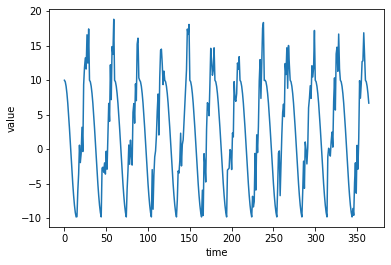

In [ ]:
#데이터 생성(시계열)
time = np.arange(365)
month_time = (time % 30) / 30
#month_time

time_series = 10 * np.where(month_time < 0.5, 
                            np.cos(2 * np.pi * month_time),
                            np.cos(2 * np.pi * month_time) + np.random.random(365))
plt.xlabel('time')
plt.ylabel('value')
plt.plot(np.arange(0, 365), time_series[:365])


In [ ]:
#데이터 전처리
def make_sequence(time_series, n):
  train_data, train_label = [], []

  for i in range(len(time_series)):
    t = time_series[i:(i+n)]

    if (i+n) < len(time_series):
      train_data.append(t)
      train_label.append(time_series[i+n])
    else:
      break
    
  return np.array(train_data), np.array(train_label)

train_data, train_label = make_sequence(time_series, 10)
train_data[0]

array([10.        ,  9.78147601,  9.13545458,  8.09016994,  6.69130606,
        5.        ,  3.09016994,  1.04528463, -1.04528463, -3.09016994])

In [ ]:
# 데이터 변환
train_data = train_data.reshape(-1, 10, 1)    #자동 x 10 x 1 
train_label = train_label.reshape(-1, 1)      #
train_data.shape

(355, 10, 1)

In [ ]:
#학습데이터, 테스트데이터
_train_data = train_data[:300]
_train_label = train_label[:300]

_test_data = train_data[300:]
_test_label = train_label[300:]

_train_data.shape

(300, 10, 1)

In [ ]:
#모델 설계
model = Sequential()
model.add(SimpleRNN(units=32, activation='tanh', input_shape=(10, 1)))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 32)                1088      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#모델 설정
model.compile(optimizer='Adam', loss='mse', metrics=['acc'])

In [ ]:
# 모델 학습
model.fit(_train_data, _train_label, epochs=1000)

Epoch 1/1000
10/10 [==============================] - 1s 5ms/step - loss: 72.1232 - acc: 0.0000e+00
Epoch 2/1000
10/10 [==============================] - 0s 4ms/step - loss: 63.3326 - acc: 0.0000e+00
Epoch 3/1000
10/10 [==============================] - 0s 4ms/step - loss: 55.1467 - acc: 0.0000e+00
Epoch 4/1000
10/10 [==============================] - 0s 5ms/step - loss: 48.2822 - acc: 0.0000e+00
Epoch 5/1000
10/10 [==============================] - 0s 4ms/step - loss: 42.4639 - acc: 0.0000e+00
Epoch 6/1000
10/10 [==============================] - 0s 4ms/step - loss: 37.9205 - acc: 0.0000e+00
Epoch 7/1000
10/10 [==============================] - 0s 4ms/step - loss: 33.9446 - acc: 0.0000e+00
Epoch 8/1000
10/10 [==============================] - 0s 4ms/step - loss: 30.7445 - acc: 0.0000e+00
Epoch 9/1000
10/10 [==============================] - 0s 4ms/step - loss: 28.1691 - acc: 0.0000e+00
Epoch 10/1000
10/10 [==============================] - 0s 4ms/step - loss: 25.9480 - acc: 0.0000e+00

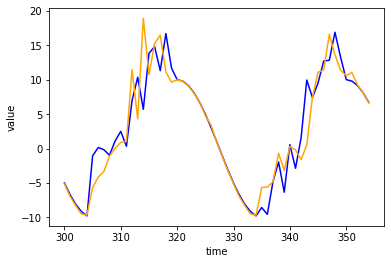

In [ ]:
#모델 테스트 시각화
result = model.predict(_test_data)

result_range = np.arange(len(_train_label), len(_train_label) + len(result))

plt.xlabel('time')
plt.ylabel('value')

plt.plot(result_range, _test_label, color = 'blue', label = 'label')
plt.plot(result_range, result, color = 'orange', label = 'result')
plt.show()